In [1]:
import sys
sys.path.append('/Users/czkaiweb/Research/ErdosBootCamp/May2022/vanGogh-and-Other-Artist')
from genericCNN import *
from preprocessing.ImageTranform import *
from torchsummary import summary

In [2]:
myObj = genericCNN()
myTransform = ImageTransformer((224,224))
myTransform.initTransform()

transformer = myTransform.getTransformer()


In [3]:
myObj.setDataset("../data/meta.csv",path = "../data/imgs")

In [14]:
myObj.setTransformer(transformer)
myObj.splitData(val_size=0.2,fraction = 0.1)

In [15]:
#myObj.setTransformer(transformer)
#transformer["train"]
#myObj.valTransform
myObj.loadData()


In [16]:
dataset = myObj.trainDataset
dataset[0]['image'].shape

torch.Size([3, 224, 224])

In [7]:
myObj.trainTransform

Compose(
    Resize(size=260, interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(224, 224))
    RandomHorizontalFlip(p=0.5)
    ColorJitter(brightness=[0.8, 1.2], contrast=[0.8, 1.2], saturation=[0.9, 1.1], hue=[-0.1, 0.1])
    RandomAffine(degrees=(-40, 40), scale=(1, 2), shear=(-15, 15))
    ToTensor()
)

0 torch.Size([5, 3, 224, 224]) tensor([5, 0, 0, 4, 0])
torch.Size([5, 3, 224, 224])


<Figure size 432x288 with 0 Axes>

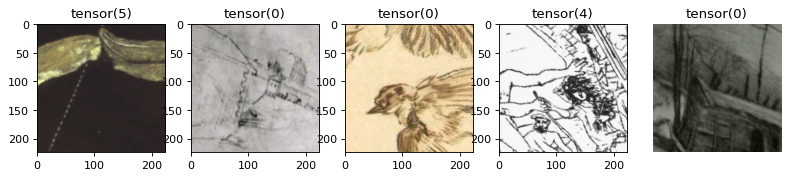

In [8]:
myObj.showDatasetBatch()

In [9]:
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

model_ft = models.vgg16()
model_ft.load_state_dict(torch.load('./weights/vgg16-397923af.pth'))
num_ftrs = model_ft.classifier[6].in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.classifier[6] = nn.Linear(num_ftrs, 6)

model_ft = model_ft.to(myObj.device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [10]:
myObj.setModel(model = model_ft,modeltag="vgg16mod")

In [17]:
myObj.checkDataset()
#

a2bbef5813e42924f2168bef12a26478 torch.Size([4, 224, 224])
ee7c58e67dabd4b7459bddf9f669f707 torch.Size([1, 224, 224])


for index, data in enumerate(myObj.trainDataset):
    print(index)
    inputs = data["image"]
    labels = data["artist"]
    if tuple(inputs.shape) != (3,224,224):
        reLoadFlag = True
        print(data["hash"],inputs.shape)
        myObj.trainDF.drop(myObj.trainDF[myObj.trainDF["hash"]==data["hash"]].index)

In [12]:
#tuple(myObj.trainDataset[0]["image"].shape)

In [18]:
myObj.train_model(criterion, optimizer_ft, exp_lr_scheduler, num_epochs=2)

Epoch 0 Phase train:   0%|          | 0/91 [00:00<?, ?batch/s]

Epoch 0/1
----------


  0%|          | 0/23 [00:00<?, ?batch/s]

train Loss: 1.4106 Acc: 0.4712


Epoch 1 Phase train:   0%|          | 0/91 [00:00<?, ?batch/s]

val Loss: 3.6655 Acc: 0.2124

Epoch 1/1
----------


  0%|          | 0/23 [00:00<?, ?batch/s]

train Loss: 1.5489 Acc: 0.4403


Epoch 1 Phase val: 100%|██████████| 23/23 [01:00<00:00,  2.62s/batch]


val Loss: 1.2499 Acc: 0.6018

Training complete in 21m 4s
Best val Acc: 0.601770


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1